# House prices regression by Leon Zhang, Yonjoo Kim, Nicole Yip

## Data cleaning and pre-processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: Data overview

In [4]:
# Reading data from file
df = pd.read_csv('/Users/nicoly/desktop/UChicago/Machine Learning/ML_project1/kc_house_data.csv')

In [3]:
df.shape # shape: samples, attributes

(21613, 21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Part 2: Data cleaning

In [5]:
# Check missing values
null_sum = df.isnull().sum()
null_sum

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in this dataset.

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# What to do with date as object? --> Check this

#### Processing numerical data

In [8]:
# Is it better to keep int and float separate or convert all to float?

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# How to justify not processing zip/lat/long?

- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- sqft_living15
- sqft_lot15

We will decide appropriate outliers to remove: if it is in the hundreds, we will remove them as they are likely true outliers. In the thousands, it may represent natural variation that we want to keep in the dataset.

#### bedrooms

<AxesSubplot:xlabel='bedrooms'>

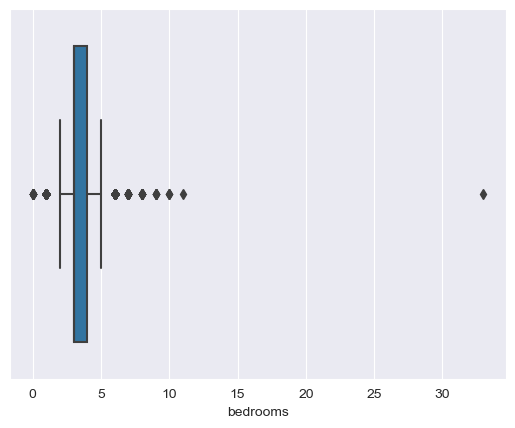

In [11]:
# draw box plot to check outliers
snsb.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['bedrooms'], orient='h')

In [20]:
Q1 = np.quantile(df['bedrooms'], 0.25)
Q3 = np.quantile(df['bedrooms'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['bedrooms']< lower_thresh]), "Len of outliers above max", len(df[df['bedrooms']> upper_thresh]))

Q1: 3.0 Q3: 4.0 min: 1.5 max: 5.5
Len of outliers under min 212 Len of outliers above max 334


In [21]:
df.shape

(21613, 21)

In [23]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['bedrooms'] > upper_thresh].index, inplace=True)
df.drop(df[df['bedrooms'] < lower_thresh].index, inplace=True)
df.shape

(21067, 21)

#### bathrooms

<AxesSubplot:xlabel='bathrooms'>

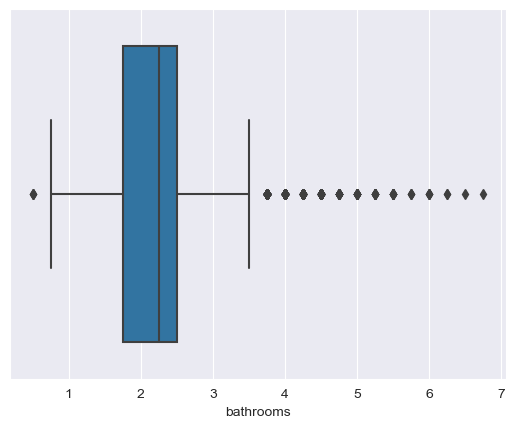

In [24]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['bathrooms'], orient='h')

In [25]:
Q1 = np.quantile(df['bathrooms'], 0.25)
Q3 = np.quantile(df['bathrooms'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['bathrooms']< lower_thresh]), "Len of outliers above max", len(df[df['bathrooms']> upper_thresh]))

Q1: 1.75 Q3: 2.5 min: 0.625 max: 3.625
Len of outliers under min 3 Len of outliers above max 458


In [26]:
df.shape

(21067, 21)

In [27]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['bathrooms'] > upper_thresh].index, inplace=True)
df.drop(df[df['bathrooms'] < lower_thresh].index, inplace=True)
df.shape

(20606, 21)

#### sqft_living

<AxesSubplot:xlabel='sqft_living'>

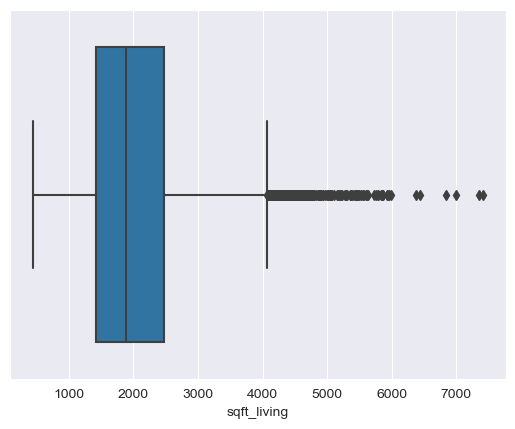

In [28]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_living'], orient='h')

In [29]:
Q1 = np.quantile(df['sqft_living'], 0.25)
Q3 = np.quantile(df['sqft_living'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_living']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_living']> upper_thresh]))

Q1: 1420.0 Q3: 2480.0 min: -170.0 max: 4070.0
Len of outliers under min 0 Len of outliers above max 377


In [30]:
df.shape

(20606, 21)

In [32]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['sqft_living'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_living'] < lower_thresh].index, inplace=True)
df.shape

(20229, 21)

#### sqft_lot

<AxesSubplot:xlabel='sqft_lot'>

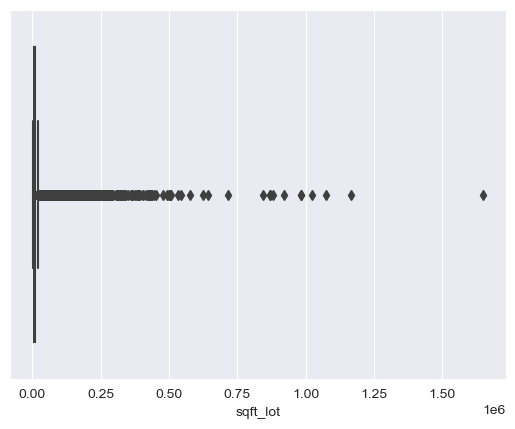

In [14]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_lot'], orient='h')

In [35]:
Q1 = np.quantile(df['sqft_lot'], 0.25)
Q3 = np.quantile(df['sqft_lot'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_lot']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_lot']> upper_thresh]))

Q1: 5000.0 Q3: 10300.0 min: -2950.0 max: 18250.0
Len of outliers under min 0 Len of outliers above max 2148


As we have mentioned above, we will not remove outliers if we believe that it may be due to natural variation. In this variable, there are 2148 outliers in out dataset which originally has above 20k instances. We believe that removing these outliers may impact our analysis and create an unrealistic model that is not complex enough.

In [36]:
df.shape

(20229, 21)

#### floors

<AxesSubplot:xlabel='floors'>

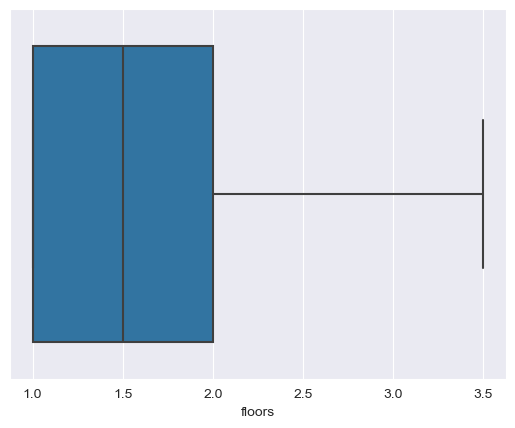

In [15]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['floors'], orient='h')

In [37]:
Q1 = np.quantile(df['floors'], 0.25)
Q3 = np.quantile(df['floors'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['floors']< lower_thresh]), "Len of outliers above max", len(df[df['floors']> upper_thresh]))

Q1: 1.0 Q3: 2.0 min: -0.5 max: 3.5
Len of outliers under min 0 Len of outliers above max 0


No outliers. 

#### waterfront

<AxesSubplot:xlabel='waterfront'>

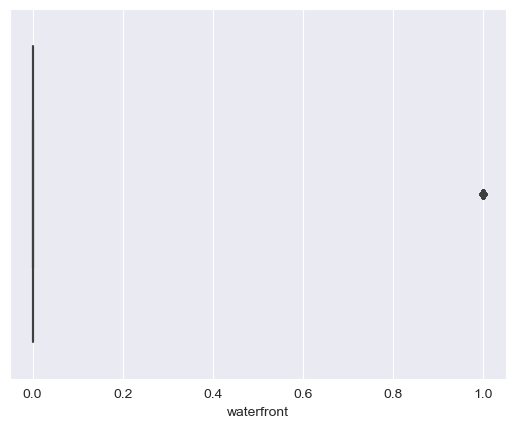

In [16]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['waterfront'], orient='h')

In [38]:
Q1 = np.quantile(df['waterfront'], 0.25)
Q3 = np.quantile(df['waterfront'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['waterfront']< lower_thresh]), "Len of outliers above max", len(df[df['waterfront']> upper_thresh]))

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Len of outliers under min 0 Len of outliers above max 114


With this case, there are 114 outliers. However, all these outliers, if we refer to df.describe from above, are "1", indicating the presence of a waterfront property. These are not technically outliers, in our opinion, as there are simply just not many properties that are waterfront. Instead of removing them, we will note not to use "waterfront" as a feature in our models, as it is not a common enough feature to gain information from, but also we will not remove it as outliers as the 114 instances may have useful information about the houses other than its property of having a waterfront location.

#### view

<AxesSubplot:xlabel='view'>

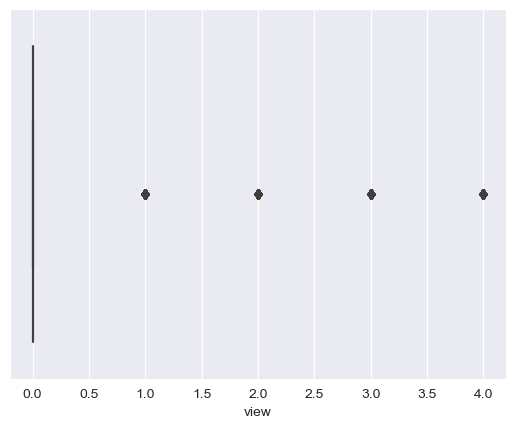

In [17]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['view'], orient='h')

In [39]:
Q1 = np.quantile(df['view'], 0.25)
Q3 = np.quantile(df['view'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['view']< lower_thresh]), "Len of outliers above max", len(df[df['view']> upper_thresh]))

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Len of outliers under min 0 Len of outliers above max 1736


Here we notice that there are 1736 outliers above max. We have created the standard that we will not remove when the outliers number is in the thousands. However, we will also note that the "view" variable indicates a rating of the view of the house, and only 1736 out of around 20k instances have this rating. We will not remove them as outliers as that may impact our data integrity, but we will note that this should not therefore be used as a feature in our model, as most of the instances do not have information for this column.

#### condition

<AxesSubplot:xlabel='condition'>

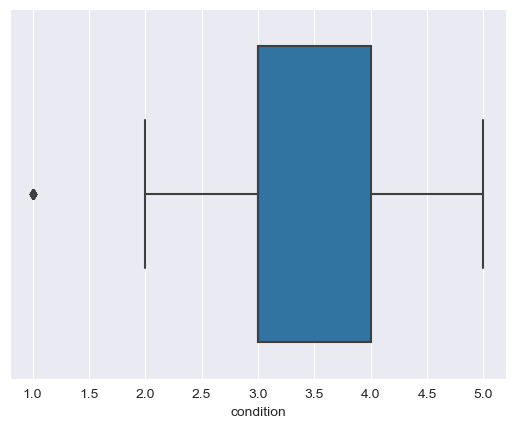

In [40]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['condition'], orient='h')

In [41]:
Q1 = np.quantile(df['condition'], 0.25)
Q3 = np.quantile(df['condition'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['condition']< lower_thresh]), "Len of outliers above max", len(df[df['condition']> upper_thresh]))

Q1: 3.0 Q3: 4.0 min: 1.5 max: 5.5
Len of outliers under min 24 Len of outliers above max 0


In [42]:
df.shape

(20229, 21)

In [43]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['condition'] > upper_thresh].index, inplace=True)
df.drop(df[df['condition'] < lower_thresh].index, inplace=True)
df.shape

(20205, 21)

#### grade

<AxesSubplot:xlabel='grade'>

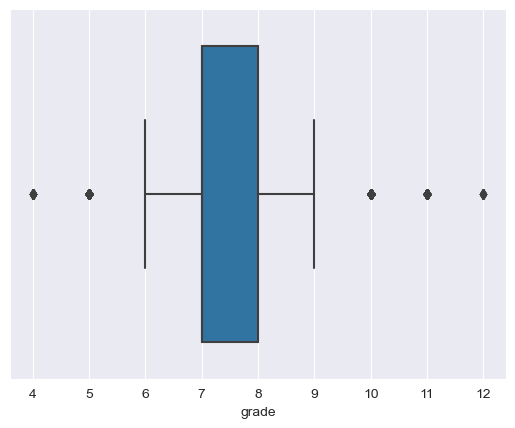

In [44]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['grade'], orient='h')

In [45]:
Q1 = np.quantile(df['grade'], 0.25)
Q3 = np.quantile(df['grade'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['grade']< lower_thresh]), "Len of outliers above max", len(df[df['grade']> upper_thresh]))

Q1: 7.0 Q3: 8.0 min: 5.5 max: 9.5
Len of outliers under min 208 Len of outliers above max 969


There are too many outliers based on our standard to remove (208 + 969). We will not remove these outliers as they might represent natural variation. Also, it is notable that this variable represents a grade rating, supporting the idea that this is probably natural variation (as some houses must be bad, good, on the extremes on a scale etc)

#### sqft_above

<AxesSubplot:xlabel='sqft_above'>

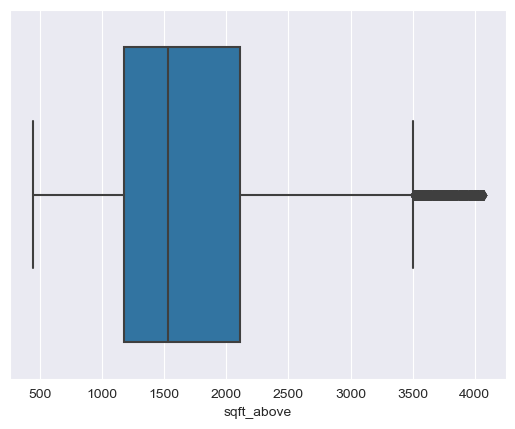

In [46]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_above'], orient='h')

In [47]:
Q1 = np.quantile(df['sqft_above'], 0.25)
Q3 = np.quantile(df['sqft_above'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_above']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_above']> upper_thresh]))

Q1: 1180.0 Q3: 2110.0 min: -215.0 max: 3505.0
Len of outliers under min 0 Len of outliers above max 356


In [48]:
df.shape

(20205, 21)

In [49]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['sqft_above'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_above'] < lower_thresh].index, inplace=True)
df.shape

(19849, 21)

#### sqft_basement

<AxesSubplot:xlabel='sqft_basement'>

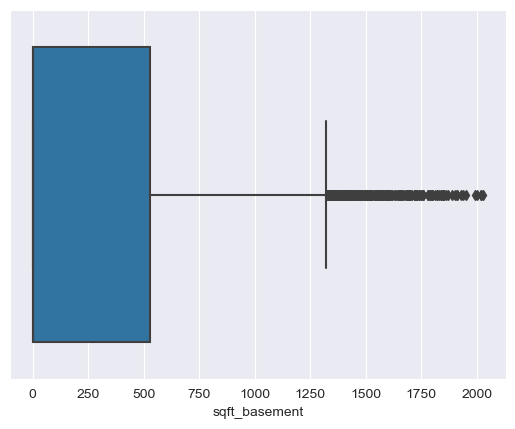

In [50]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_basement'], orient='h')

In [51]:
Q1 = np.quantile(df['sqft_basement'], 0.25)
Q3 = np.quantile(df['sqft_basement'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_basement']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_basement']> upper_thresh]))

Q1: 0.0 Q3: 530.0 min: -795.0 max: 1325.0
Len of outliers under min 0 Len of outliers above max 398


In [52]:
df.shape

(19849, 21)

In [53]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['sqft_basement'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_basement'] < lower_thresh].index, inplace=True)
df.shape

(19451, 21)

#### yr_built

<AxesSubplot:xlabel='yr_built'>

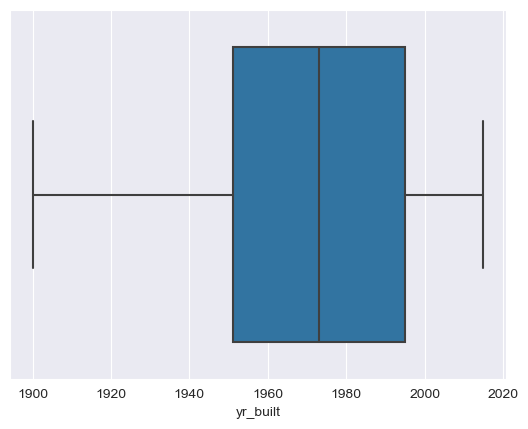

In [54]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['yr_built'], orient='h')

In [55]:
Q1 = np.quantile(df['yr_built'], 0.25)
Q3 = np.quantile(df['yr_built'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['yr_built']< lower_thresh]), "Len of outliers above max", len(df[df['yr_built']> upper_thresh]))

Q1: 1951.0 Q3: 1995.0 min: 1885.0 max: 2061.0
Len of outliers under min 0 Len of outliers above max 0


No outliers.

#### yr_renovated

<AxesSubplot:xlabel='yr_renovated'>

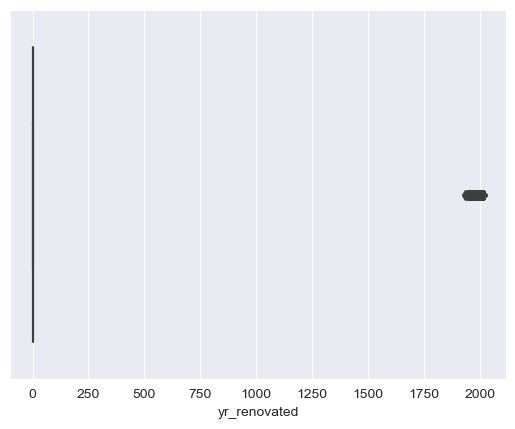

In [56]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['yr_renovated'], orient='h')

In [57]:
Q1 = np.quantile(df['yr_renovated'], 0.25)
Q3 = np.quantile(df['yr_renovated'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['yr_renovated']< lower_thresh]), "Len of outliers above max", len(df[df['yr_renovated']> upper_thresh]))

Q1: 0.0 Q3: 0.0 min: 0.0 max: 0.0
Len of outliers under min 0 Len of outliers above max 762


In this case, we have 762 outliers, which normally should fit our standard of outliers to remove. However, in this case, it seems that for this particular variable, all the other instances are 0, meaning that there is no information on year renovated. Therefore, it seems like the outliers here have more to do with the fact that the original dataset does not have "na" and pre-filled them with 0. We will not remove these outliers as it is rather a problem that the dataset does not normally have data for this column. Rather, we will remove this column as a feature to train our models and do analyses (aka "drop na").

#### sqft_living15

<AxesSubplot:xlabel='sqft_living15'>

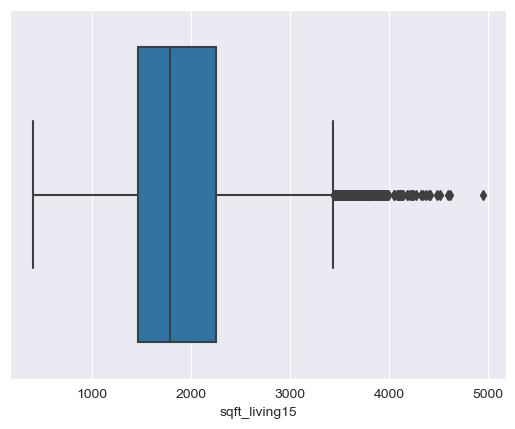

In [58]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_living15'], orient='h')

In [59]:
Q1 = np.quantile(df['sqft_living15'], 0.25)
Q3 = np.quantile(df['sqft_living15'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_living15']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_living15']> upper_thresh]))

Q1: 1460.0 Q3: 2250.0 min: 275.0 max: 3435.0
Len of outliers under min 0 Len of outliers above max 253


In [60]:
df.shape

(19451, 21)

In [61]:
# Based on the above calculation, and our standard we wrote above, we will remove samples that are outliers
df.drop(df[df['sqft_living15'] > upper_thresh].index, inplace=True)
df.drop(df[df['sqft_living15'] < lower_thresh].index, inplace=True)
df.shape

(19198, 21)

#### sqft_lot15

<AxesSubplot:xlabel='sqft_lot15'>

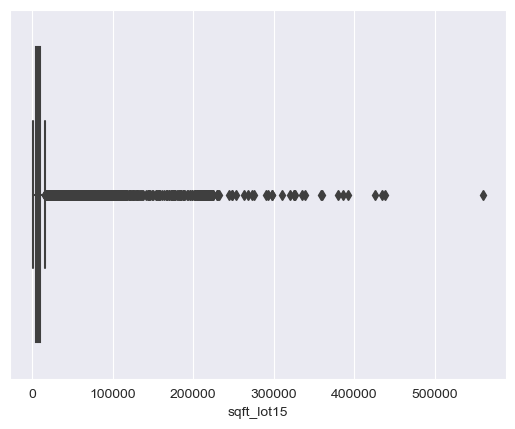

In [62]:
# draw box plot to check outliers
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=df['sqft_lot15'], orient='h')

In [63]:
Q1 = np.quantile(df['sqft_lot15'], 0.25)
Q3 = np.quantile(df['sqft_lot15'], 0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5 * IQR
upper_thresh = Q3 + 1.5 * IQR
print("Q1:", Q1, "Q3:", Q3, "min:", lower_thresh, "max:", upper_thresh)
print("Len of outliers under min", len(df[df['sqft_lot15']< lower_thresh]), "Len of outliers above max", len(df[df['sqft_lot15']> upper_thresh]))

Q1: 5000.0 Q3: 9680.0 min: -2020.0 max: 16700.0
Len of outliers under min 0 Len of outliers above max 1644


Adhereing to the standards we set above, 1644 outliers is too many to remove as it may be natural variation.

In the data cleaning process, we have justified each outlier removal process according to the standard we set above. Notably, we have noticed that we should drop the columns "waterfront" "view" and "yr_renovated" as it seems they are technically columns with many NA values that have been pre-filled to be 0.

Also, we have not touched zipcode, lat, long for the cleaning process as the "outliers" would not make sense as outliers, as these are geographical information and as such the outliers will not be well captured by IQR.

In [66]:
# We should decide whether to drop zipcode/lat/long columns

In [64]:
# Drop columns
df.drop(columns=["waterfront", "view", "yr_renovated"], inplace=True)

In [65]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

## Exploratory data analysis